In [1]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [2]:
#load your dataset here
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

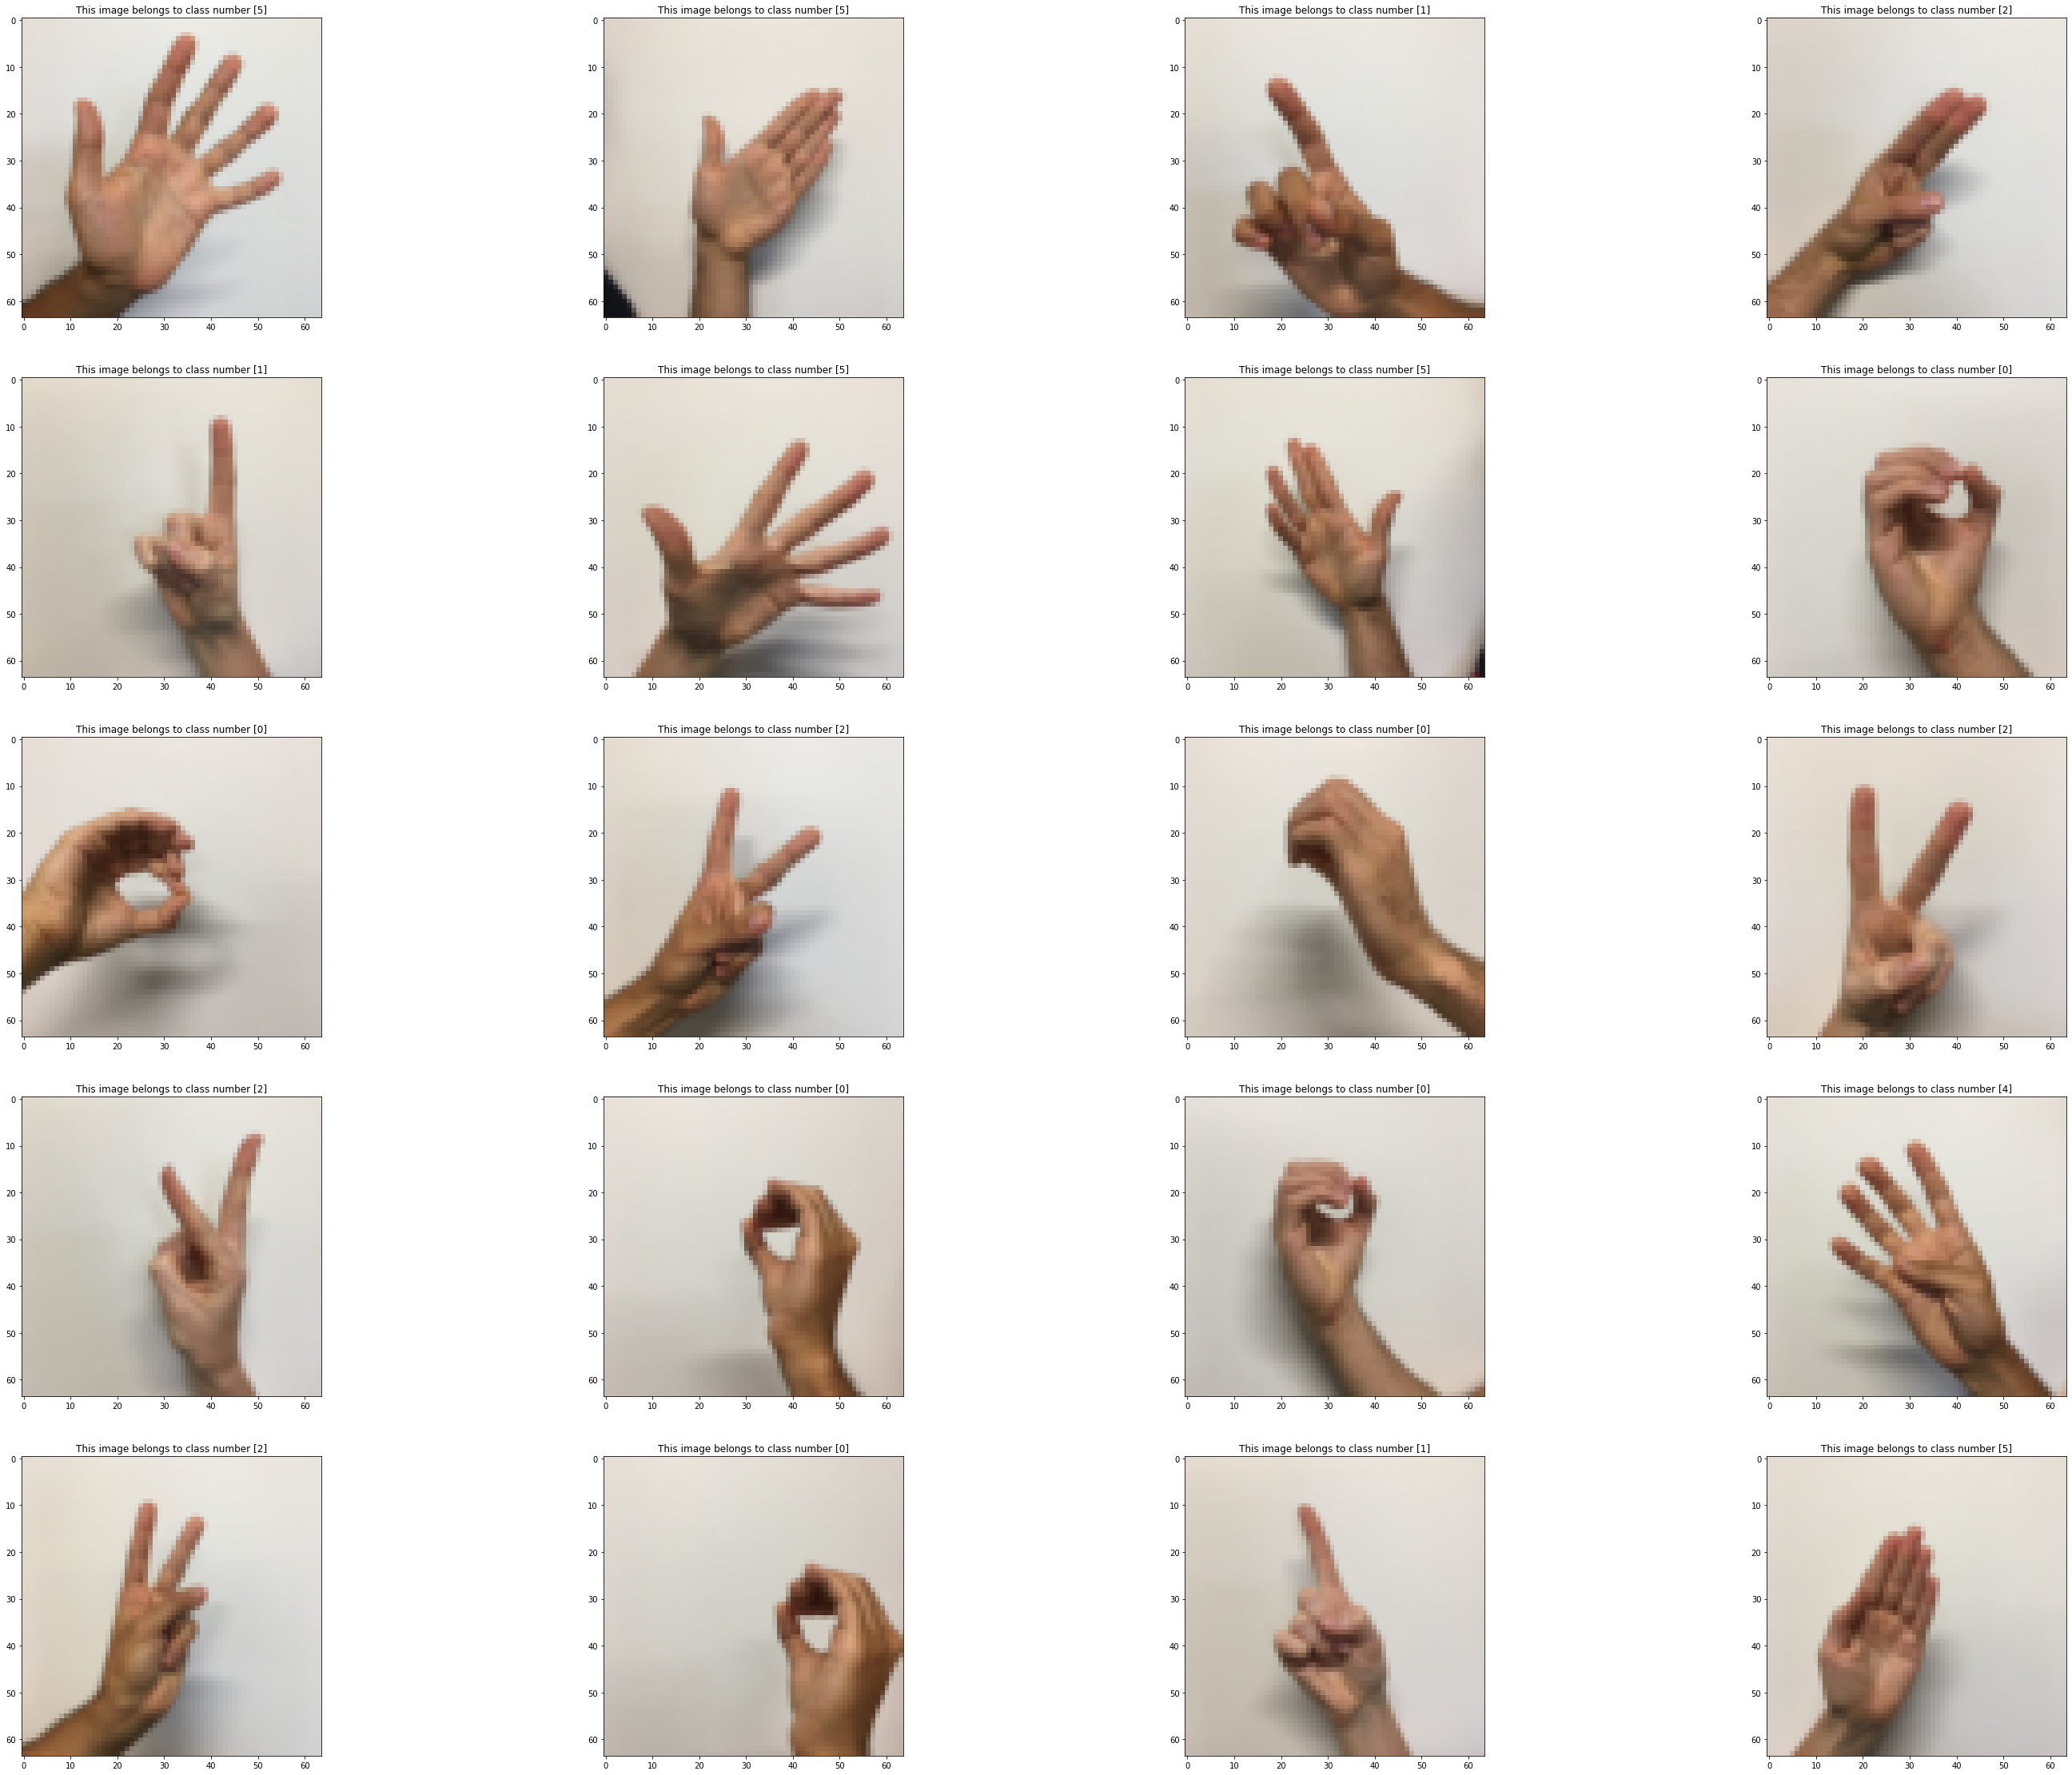

In [3]:
# Plot here 
import matplotlib.pyplot as plt
%matplotlib inline
rand = np.random.randint(low=0, high=len(X_train_orig)-1, size=20).tolist()
plt.figure(figsize=(50,40))
# loop to pick one number from the list and subplot it on its index
for i in rand:
    plt.subplot(5,4, rand.index(i)+1)
    plt.imshow(X_train_orig[i])
    plt.title('This image belongs to class number {}'.format(Y_train_orig[i]))

In [4]:
# Normalize the data
X_train = X_train_orig/255
X_test = X_test_orig/255

In [5]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(Y_train_orig)
onehot_train = enc.transform(Y_train_orig).toarray()
onehot_test = enc.transform(Y_test_orig).toarray()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [6]:
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Using TensorFlow backend.


In [7]:
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=X_train_orig.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.fit(X_train_orig/255, onehot_train, batch_size=500, epochs=100,
          validation_data=(X_test_orig/255, onehot_test))

Instructions for updating:
Use tf.cast instead.
Train on 1080 samples, validate on 120 samples
Epoch 1/100
1080/1080 [==============================] - 11s 11ms/step - loss: 3.3371 - acc: 0.1583 - val_loss: 1.8776 - val_acc: 0.1667
Epoch 2/100
1080/1080 [==============================] - 7s 7ms/step - loss: 1.8166 - acc: 0.2065 - val_loss: 1.8101 - val_acc: 0.1667
Epoch 3/100
1080/1080 [==============================] - 7s 7ms/step - loss: 1.7823 - acc: 0.2000 - val_loss: 1.7357 - val_acc: 0.1833
Epoch 4/100
1080/1080 [==============================] - 8s 7ms/step - loss: 1.7132 - acc: 0.2898 - val_loss: 1.6514 - val_acc: 0.4333
Epoch 5/100
1080/1080 [==============================] - 7s 7ms/step - loss: 1.6015 - acc: 0.4917 - val_loss: 1.6004 - val_acc: 0.3250
Epoch 6/100
1080/1080 [==============================] - 8s 7ms/step - loss: 1.5050 - acc: 0.3907 - val_loss: 1.4567 - val_acc: 0.4417
Epoch 7/100
1080/1080 [==============================] - 8s 7ms/step - loss: 1.3477 - acc: 0.